# 1 Forecasting Stock Prices<a id='1_forecasting_stock_prices'></a>

## 1.1 Contents<a id=1.1_Contents></a>
* [Forecasting Stock Prices](#1_forecasting_stock_prices)
    * [1.1 Contents](#1.1_Contents)
    * [1.2 Problem Statement](#1.2_Problem_Statement)
    * [1.3 Imports](#1.3_Imports)
    * [1.4 Objectives](#1.4_Objectives)
    * [1.5 Load the Data](#1.5_Load_the_Data)
    * [1.6 Exlore the Data](#1.6_Explore_the_Data)
    

## 1.2 Problem Statement<a id='1.2_Problem_Statement'></a>
This project aims to analyze the impact of significant historical events on the stock prices of Pepsi and Coca-Cola over the past 20 years. By examing the price fluctuations around five  key events - The 2001 Dot-Com bubble, The 9/11 Attacks, The 2008 Financial Crisis, The 2016 Presidential election, and The Covid Pandemic. The study seeks to understand how these events influenced market behavior and investor sentiment.

## 

## 1.3 Import<a id='1.3_Imports'></a>

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import seaborn as sns

from scipy import stats


## 1.4 Objectives<a id='1.4_Objectives'></a>

1. Load the data and organize it into dataframes.
2. Get summary statistics and an overview of the data.
3. Explore the data with vizualisations. 
4. Define event windows around each historical event
5. ...

## 1.5 Load the Data<a id='1.5_Load_the_Data'></a>

In [2]:
api_key = 'C69Q1AGNR1LPS3IL'
symbol_1 = 'KO'
url_1 = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol={symbol_1}&apikey={api_key}'

response_1 = requests.get(url_1)
data_1 = response_1.json()

symbol_2 = 'PEP'
url_2 = f'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol={symbol_2}&apikey={api_key}'

response_2 = requests.get(url_2)
data_2 = response_2.json()

## 1.6 Explore the Data<a id='1.6_Explore_the_Data'></a>

In [38]:
print(f'The keys for {symbol_1} are {data_1.keys()}')
print(f'The keys for {symbol_2} are {data_2.keys()}')

The keys for KO are dict_keys(['Meta Data', 'Weekly Adjusted Time Series'])
The keys for PEP are dict_keys(['Meta Data', 'Weekly Adjusted Time Series'])


In [40]:
print(f'The date range for the data is {list(data_1["Weekly Adjusted Time Series"].keys())[0]} to {list(data_1["Weekly Adjusted Time Series"].keys())[-1]}')

The date range for the data is 2024-10-30 to 1999-11-12


In [5]:
#  define a function to take in the scraped api data json file and output a dataframe witht the date as the index
def load_data(json_data):
    # extract the 'monthly time series' data
    weekly_series = json_data['Weekly Adjusted Time Series']
    # convert the nested dictionary into a dataframe
    df = pd.DataFrame.from_dict(weekly_series, orient='index')
    # rename columns for clarity
    df.columns = ['open', 'high', 'low', 'close', 'adjusted close', 'volume', 'dividend amount']
    # convert the index to datatime for easier handling of dates
    df.index = pd.to_datetime(df.index)
    # sort the dataframe by date
    df.sort_index(inplace=True)
    return df
    

In [6]:
df_coke = load_data(data_1)
df_pepsi = load_data(data_2)

In [7]:
# rename the index column as date
df_coke.index.name = 'date'
df_pepsi = df_pepsi.rename_axis('date')

df_coke.head()

,open,high,low,close,adjusted close,volume,dividend amount
date,,,,,,,
1999-11-12,57.9400,58.9400,56.5000,57.5000,14.4902,12376300,0.0000
1999-11-19,57.5000,60.8100,57.5000,60.5000,15.2462,17051900,0.0000
1999-11-26,61.5000,68.4400,61.5000,66.5600,16.7734,29622700,0.0000
1999-12-03,65.8800,69.0000,65.7500,68.3100,17.2554,19677300,0.1600
1999-12-10,68.1900,68.1900,58.7500,63.2500,15.9773,54066500,0.0000


In [8]:
df_pepsi.head()

,open,high,low,close,adjusted close,volume,dividend amount
date,,,,,,,
1999-11-12,33.5600,33.9400,32.4400,33.1300,17.8372,14770300,0.0000
1999-11-19,32.8100,35.1300,32.1900,34.5000,18.5748,19066500,0.0000
1999-11-26,35.1300,37.1300,34.7500,34.8800,18.7794,19433000,0.0000
1999-12-03,34.8800,37.7500,34.0600,37.1300,19.9907,26360300,0.0000
1999-12-10,37.0600,37.4400,35.7500,36.9400,19.9610,24525600,0.1350


In [9]:
# convert the data types of the columns to float

df_coke['adjusted close'] = df_coke['adjusted close'].astype(float)
df_coke['open'] = df_coke['open'].astype(float)
df_coke['high'] = df_coke['high'].astype(float)
df_coke['low'] = df_coke['low'].astype(float)
df_coke['close'] = df_coke['close'].astype(float)
df_coke['volume'] = df_coke['volume'].astype(float)
df_coke['dividend amount'] = df_coke['dividend amount'].astype(float)

df_pepsi['adjusted close'] = df_pepsi['adjusted close'].astype(float)
df_pepsi['open'] = df_pepsi['open'].astype(float)
df_pepsi['high'] = df_pepsi['high'].astype(float)
df_pepsi['low'] = df_pepsi['low'].astype(float)
df_pepsi['close'] = df_pepsi['close'].astype(float)
df_pepsi['volume'] = df_pepsi['volume'].astype(float)
df_pepsi['dividend amount'] = df_pepsi['dividend amount'].astype(float)


Exploratory Data Analysis

In [10]:
# print summary statistics and shape of the dataframe
df_coke.info()
print(f'\nThe Coca Cola data has {df_coke.shape[0]} rows and {df_coke.shape[1]} columns')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 1999-11-12 to 2024-10-30
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open             1304 non-null   float64
 1   high             1304 non-null   float64
 2   low              1304 non-null   float64
 3   close            1304 non-null   float64
 4   adjusted close   1304 non-null   float64
 5   volume           1304 non-null   float64
 6   dividend amount  1304 non-null   float64
dtypes: float64(7)
memory usage: 81.5 KB

The Coca Cola data has 1304 rows and 7 columns


In [11]:
# print summary statistics and shape of the dataframe
df_pepsi.info()
print(f'\nThe Pepsi data has {df_pepsi.shape[0]} rows and {df_pepsi.shape[1]} columns')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 1999-11-12 to 2024-10-30
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   open             1304 non-null   float64
 1   high             1304 non-null   float64
 2   low              1304 non-null   float64
 3   close            1304 non-null   float64
 4   adjusted close   1304 non-null   float64
 5   volume           1304 non-null   float64
 6   dividend amount  1304 non-null   float64
dtypes: float64(7)
memory usage: 81.5 KB

The Pepsi data has 1304 rows and 7 columns


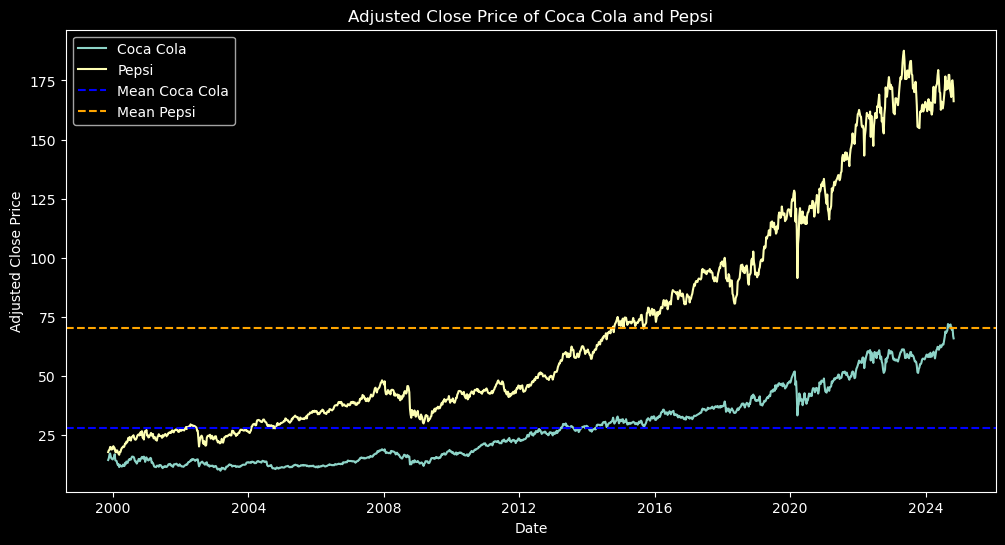

In [12]:
# find the mean adjusted daily close price for both companies to use for graphing
mean_coke = df_coke['adjusted close'].mean()
mean_pepsi = df_pepsi['adjusted close'].mean()

# plot the adjusted close price for both companies
plt.figure(figsize=(12, 6))
plt.plot(df_coke.index, df_coke['adjusted close'], label='Coca Cola')
plt.plot(df_pepsi.index, df_pepsi['adjusted close'], label='Pepsi')
plt.axhline(mean_coke, color='blue', linestyle='--', label='Mean Coca Cola')
plt.axhline(mean_pepsi, color='orange', linestyle='--', label='Mean Pepsi')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Price of Coca Cola and Pepsi')
plt.legend()
plt.show()

In [13]:
# dictionary of 5 historical events that affected the stock price of Coca Cola and Pepsi
# the keys are the names of the events and the values are the dates of the events
# 1. The 2008 Financial Crisis
# 2. The COVID-19 Pandemic
# 3. The 9
# 4. The 2001 Dot-Com Bubble
# 5. The 2016 Presidential Election

historical_events = {'The 2001 Dot-Com Bubble': '2001-03-10',
                    'The 9/11 Attacks':'2001-09-11',
                    'The 2008 Financial Crisis': '2008-09-15',
                    'The 2016 Presidential Election': '2016-11-08',
                    'The COVID-19 Pandemic': '2020-01-20'}

# convert the dates to datetime in historical_events
for key, value in historical_events.items():
    historical_events[key] = pd.to_datetime(value)
    

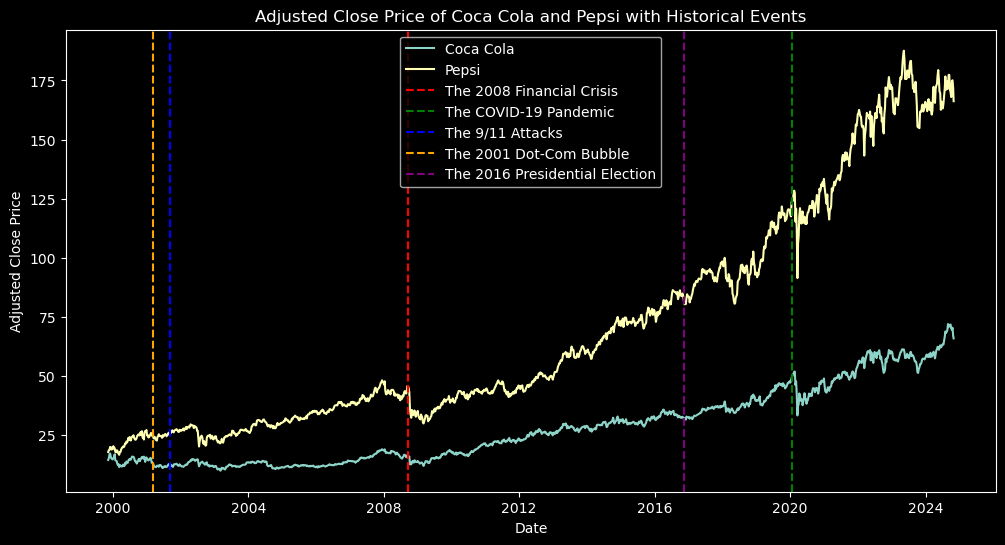

In [14]:
# plot the adjusted close price for both companies with the historical events
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

ax.plot(df_coke.index, df_coke['adjusted close'], label='Coca Cola')
ax.plot(df_pepsi.index, df_pepsi['adjusted close'], label='Pepsi')
ax.axvline(historical_events['The 2008 Financial Crisis'], color='red', linestyle='--', label='The 2008 Financial Crisis')
ax.axvline(historical_events['The COVID-19 Pandemic'], color='green', linestyle='--', label='The COVID-19 Pandemic')
ax.axvline(historical_events['The 9/11 Attacks'], color='blue', linestyle='--', label='The 9/11 Attacks')
ax.axvline(historical_events['The 2001 Dot-Com Bubble'], color='orange', linestyle='--', label='The 2001 Dot-Com Bubble')
ax.axvline(historical_events['The 2016 Presidential Election'], color='purple', linestyle='--', label='The 2016 Presidential Election')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Price of Coca Cola and Pepsi with Historical Events')
plt.legend()
plt.show()

In [15]:
# build a function to get event window data for these events
# the function should take the dataframe and the event dictionary as input
# the function should return a dictionary with the event window data for each event

# set the amount of days before and after the event
event_window_days = [10,30,60]

def get_event_window_data(df, event_dict, event_window_days):
    # check if event_window_days is an integer and convert it to a list
    if isinstance(event_window_days, int):
        event_window_days = [event_window_days]    

    # create an empty dictionary to store the event window data
    event_window_data = {}

    # loop through the events in the event dictionary
    for event, date in event_dict.items():
        # create an empty dictionary to store the event window data for the current event
        event_data = {}

        # loop through the event window days
        for days in event_window_days:
            # define the start and end dates of the event window
            start_date = date - pd.Timedelta(days=days)
            end_date = date + pd.Timedelta(days=days)

            # extract the event window data from the dataframe
            event_window = df[(df.index >= start_date) & (df.index <= end_date)]

            # add the event window data to the dictionary
            event_data[days] = event_window

        # add the event data to the event window data dictionary
        event_window_data[event] = event_data
    return event_window_data

In [16]:
# call the function for both companies
event_window_data_coke = get_event_window_data(df_coke, historical_events, event_window_days)
event_window_data_pepsi = get_event_window_data(df_pepsi, historical_events, event_window_days)

c:\Users\adame\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adame\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adame\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adame\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

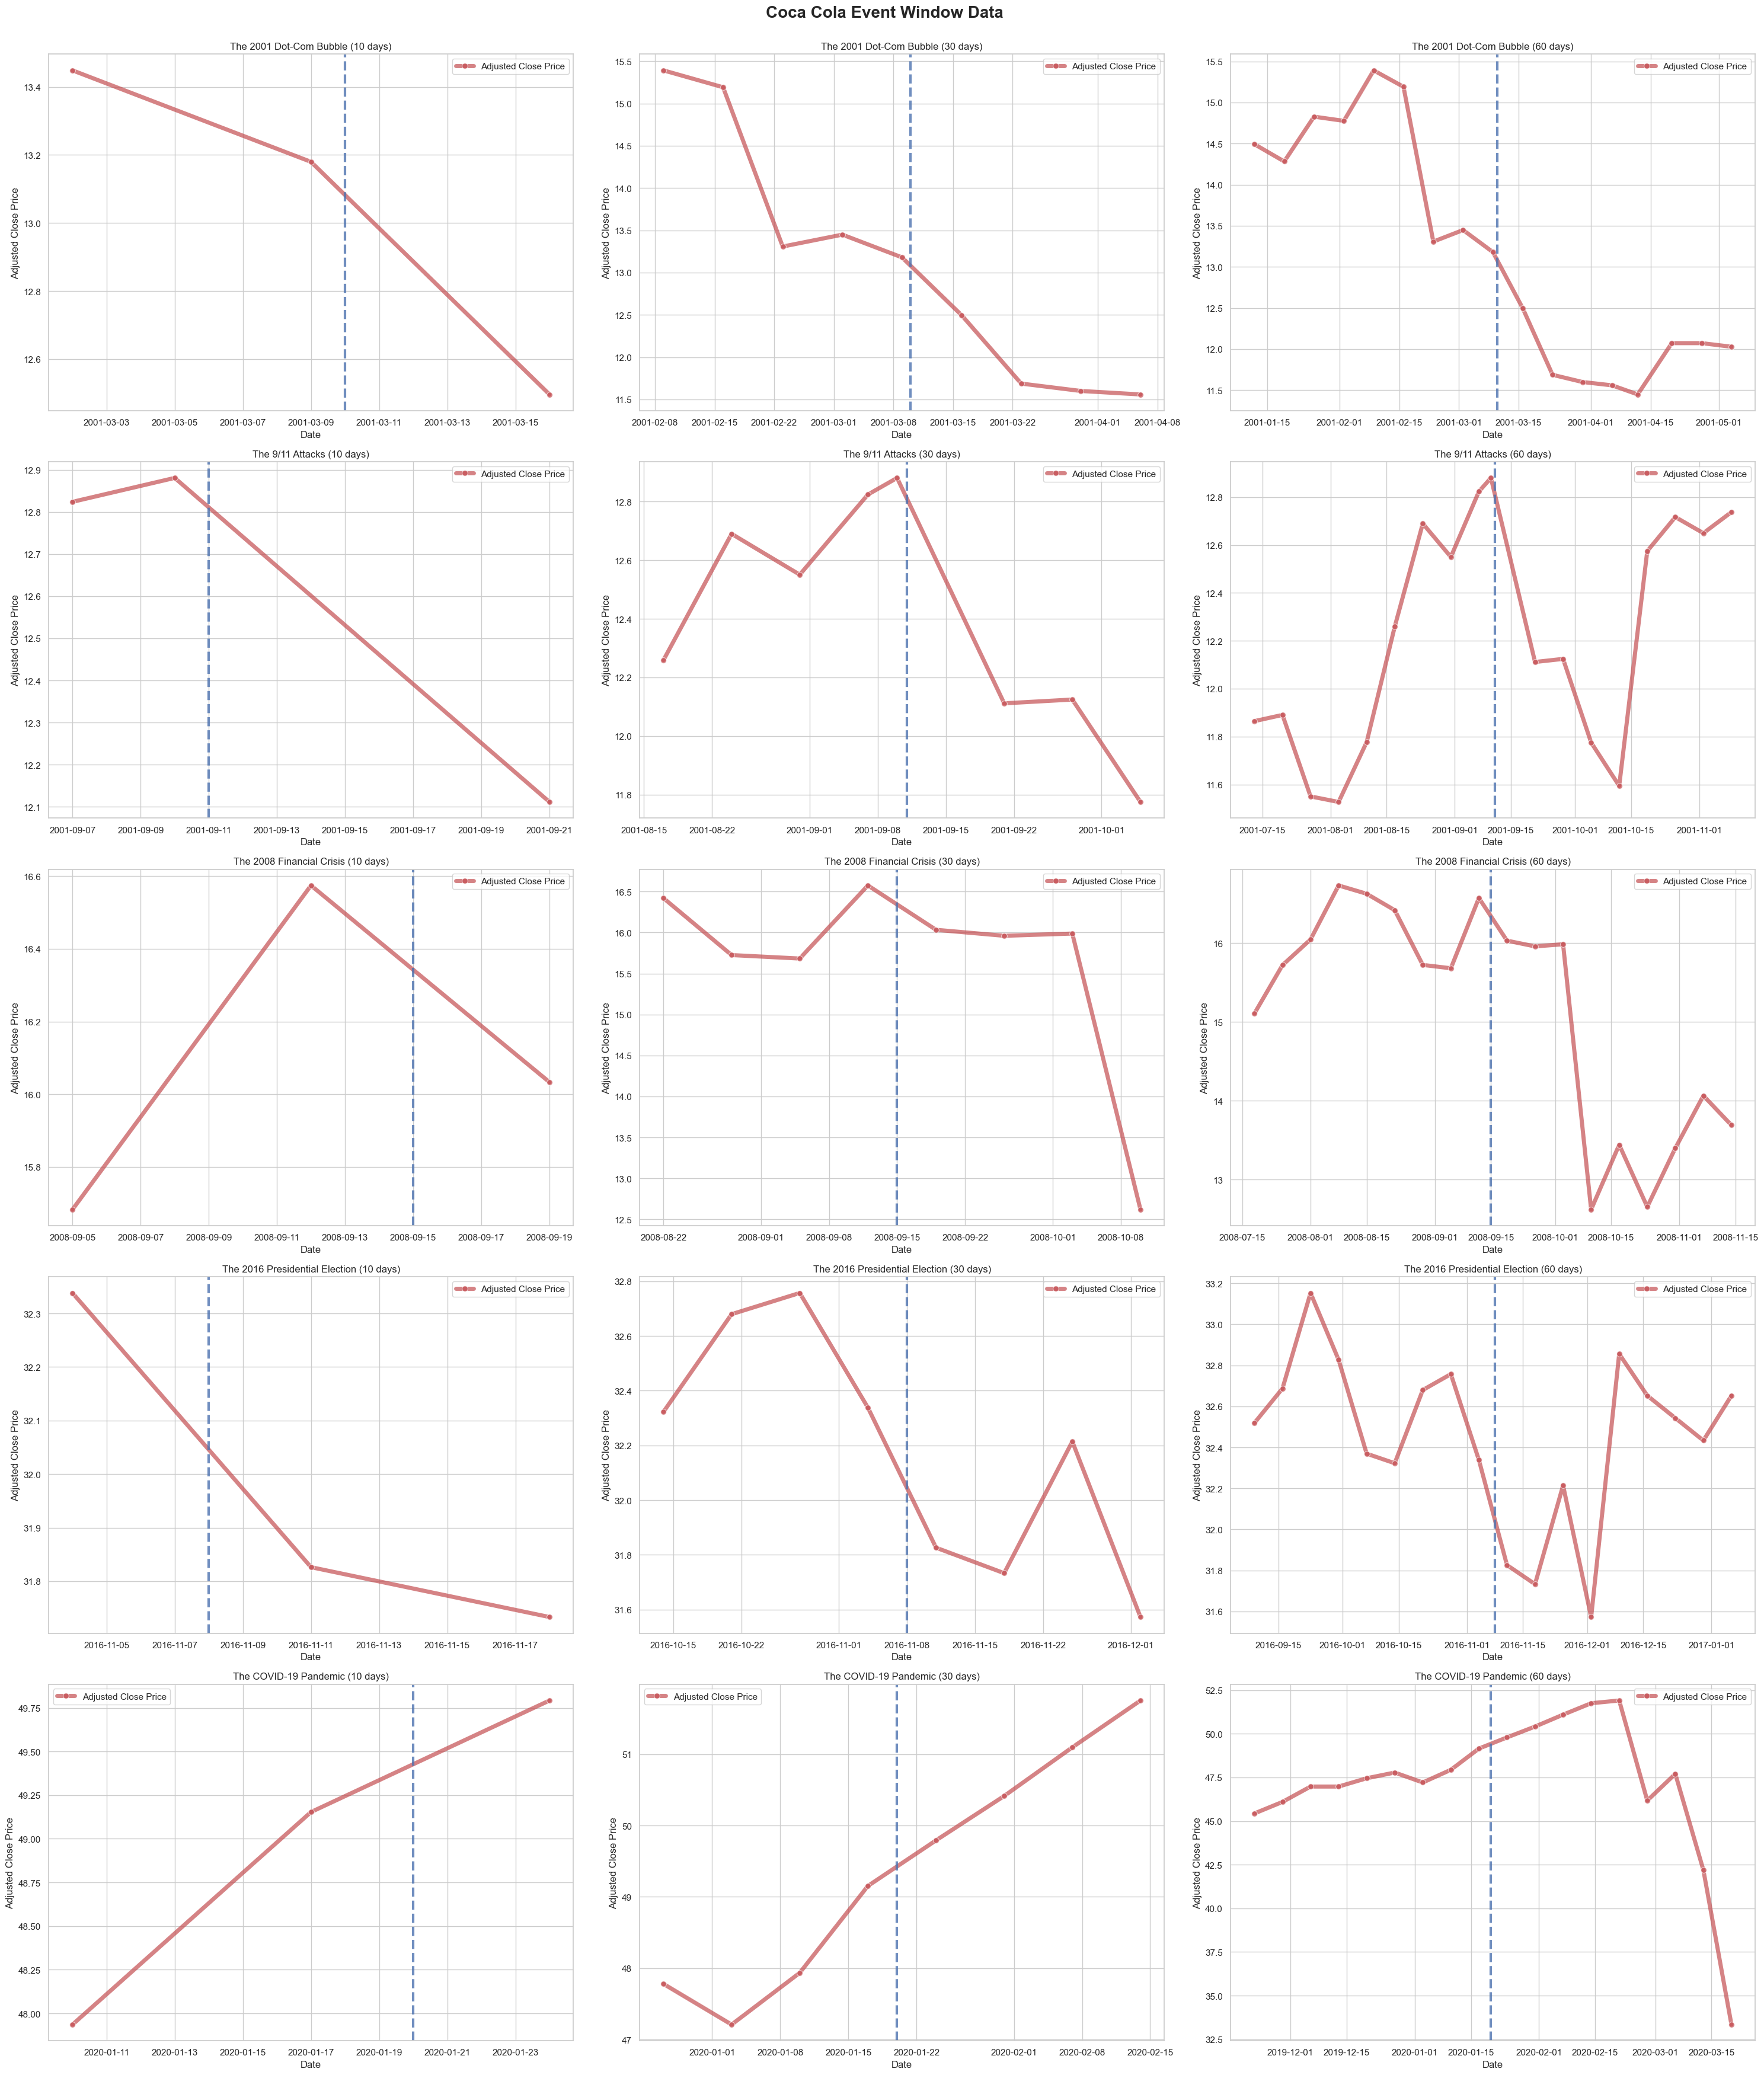

In [17]:
# plot the event window data for Coca Cola
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the event window data for Coke
fig, ax = plt.subplots(5, 3, figsize=(30, 35))
fig.suptitle('Coca Cola Event Window Data', y=1.0, fontsize=20, fontweight='bold')

for i, (event, event_data) in enumerate(event_window_data_coke.items()):
    for j, (days, data) in enumerate(event_data.items()):

        sns.lineplot(x=data.index,
                     y=data['adjusted close'],
                     ax=ax[i, j],
                     label='Adjusted Close Price',
                     color='r',
                     alpha=0.7,
                     linewidth=5,
                     linestyle='-',
                     marker='o',
                     markersize=7)
        
        ax[i, j].set_title(f'{event} ({days} days)')
        ax[i, j].set_xlabel('Date')
        ax[i, j].set_ylabel('Adjusted Close Price')
        ax[i, j].legend()
        ax[i, j].axvline(historical_events[event], color='b', linestyle='--', label=event, alpha=0.8, linewidth=3)

plt.tight_layout()
plt.show();

c:\Users\adame\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adame\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adame\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adame\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

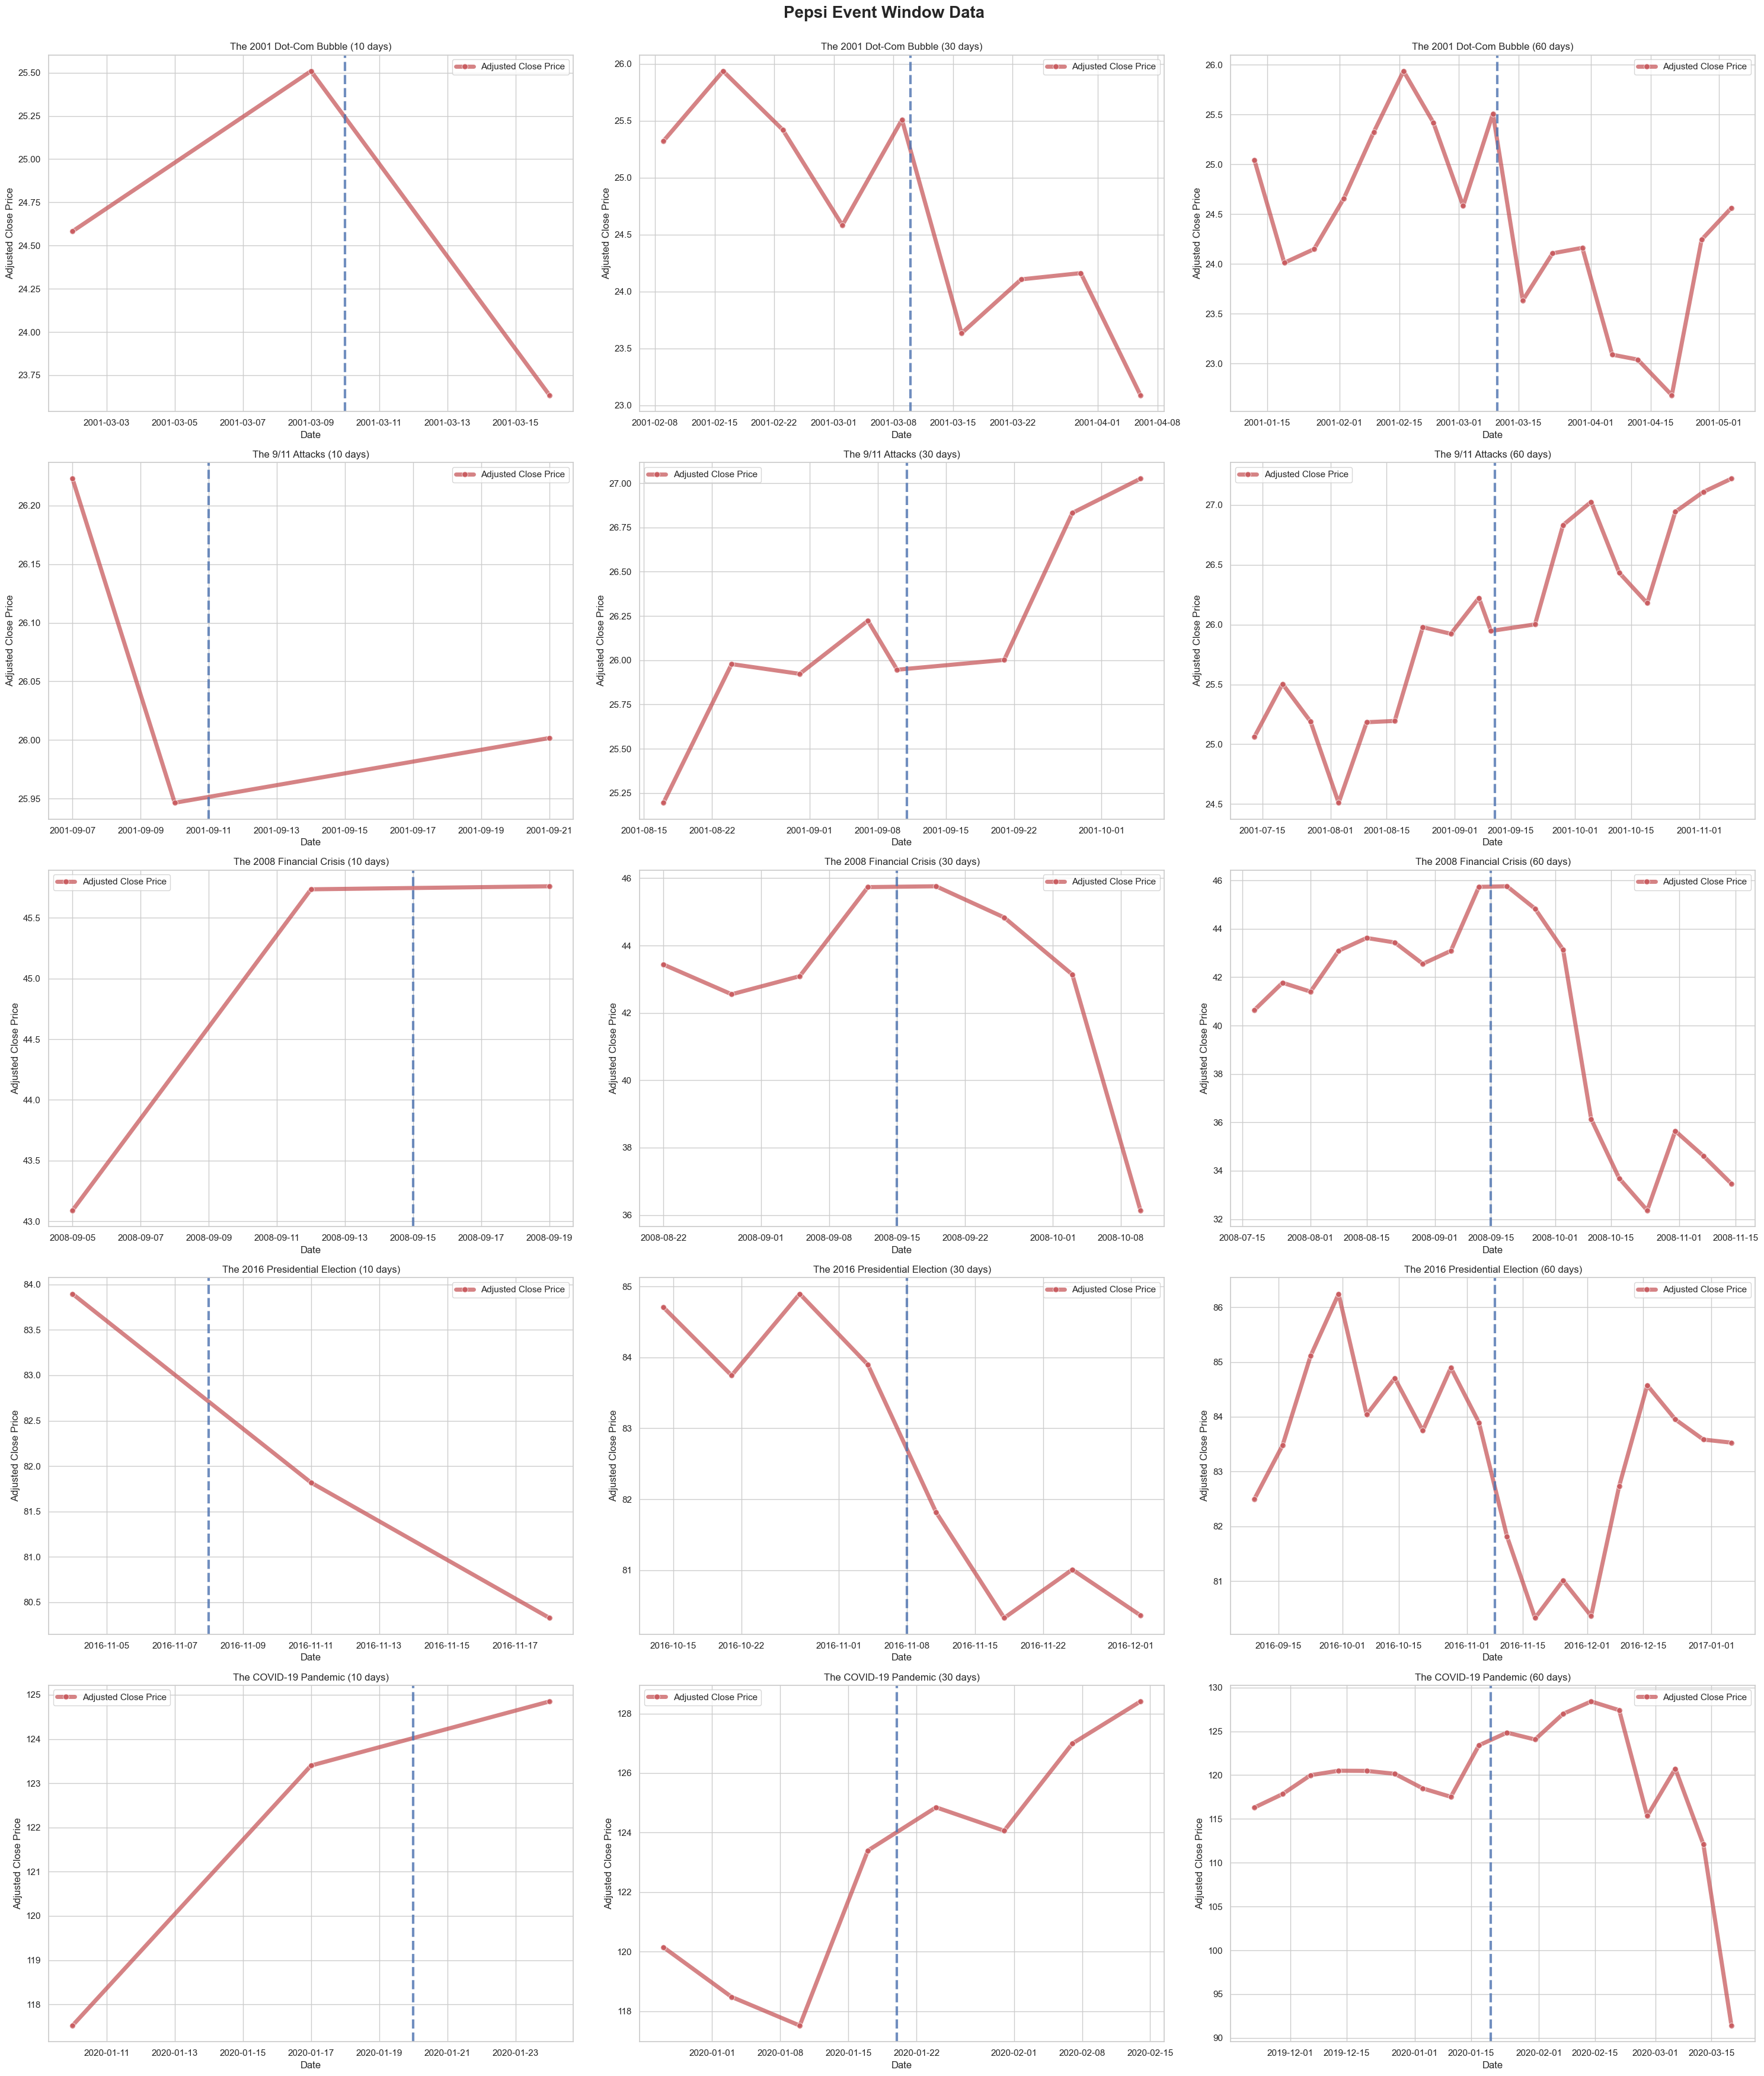

In [18]:
# plot the event window data for Pepsi
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the event window data for Coke
fig, ax = plt.subplots(5, 3, figsize=(30, 35))
fig.suptitle('Pepsi Event Window Data', y=1.0, fontsize=20, fontweight='bold')

for i, (event, event_data) in enumerate(event_window_data_pepsi.items()):
    for j, (days, data) in enumerate(event_data.items()):

        sns.lineplot(x=data.index,
                     y=data['adjusted close'],
                     ax=ax[i, j],
                     label='Adjusted Close Price',
                     color='r',
                     alpha=0.7,
                     linewidth=5,
                     linestyle='-',
                     marker='o',
                     markersize=7)
        
        ax[i, j].set_title(f'{event} ({days} days)')
        ax[i, j].set_xlabel('Date')
        ax[i, j].set_ylabel('Adjusted Close Price')
        ax[i, j].legend()
        ax[i, j].axvline(historical_events[event], color='b', linestyle='--', label=event, alpha=0.8, linewidth=3)

plt.tight_layout()
plt.show();

This turned out great. Most of the changes were predictable. 

1. Dot com bubble, makes sense. 
2. 9/11, the stocks took different paths. Coke went down and pepsi went up.
3. 08 financial crisis, both stocks went down.  Predictable. 
4. 2016 Presidential election, why would they both go down? Too much freedom?!
5. Covid, this one definitely makes sense. People needed that sugar fix during lock down.

In [19]:
# t test to compare the means of adjusted close prices for pepsi and coke during the event windows to see if theres a statistically significant difference
# create a dictionary to store the t-test results
t_test_results = {}

# loop through the event windows
for event, data in event_window_data_coke.items():
    # create an empty dictionary to store the t-test results for the current event
    results = {}

    # loop through the event window days
    for days, window_data in data.items():
        # perform a t-test to compare the means of adjusted close prices for pepsi and coke
        t_statistic, p_value = stats.ttest_ind(window_data['adjusted close'], event_window_data_pepsi[event][days]['adjusted close'], equal_var=False)
        results[days] = {'t-statistic': t_statistic, 'p-value': p_value}

    # add the t-test results to the dictionary
    t_test_results[event] = results

# print the t-test results
for event, data in t_test_results.items():
    print(event)
    for days, results in data.items():
        print(f'{days} days: t-statistic = {results["t-statistic"]}, p-value = {results["p-value"]}')
    print('\n')


The 2001 Dot-Com Bubble
10 days: t-statistic = -18.879954127007853, p-value = 0.00031135533701562816
30 days: t-statistic = -19.906797215089284, p-value = 1.2519906745886753e-11
60 days: t-statistic = -27.43165318994053, p-value = 1.6422949437940177e-21


The 9/11 Attacks
10 days: t-statistic = -51.451510866058435, p-value = 8.576027975285014e-05
30 days: t-statistic = -55.936093968896756, p-value = 2.658153658235965e-16
60 days: t-statistic = -62.62929900211084, p-value = 1.7074386095471848e-31


The 2008 Financial Crisis
10 days: t-statistic = -31.165860998028517, p-value = 0.00040495689082102566
30 days: t-statistic = -23.43472047513886, p-value = 1.4458350136213977e-09
60 days: t-statistic = -22.209844334688555, p-value = 1.1296699541259895e-15


The 2016 Presidential Election
10 days: t-statistic = -47.59314537653523, p-value = 0.00028951889746525283
30 days: t-statistic = -72.1941884376144, p-value = 3.403024439261056e-12
60 days: t-statistic = -128.00565300946363, p-value = 1.58

Predict the adjusted close price
1. split the data
2. create a pipeline
3. scale the data
4. train the model
5. predict the adjusted close price for both sets of data

In [20]:
# import needed libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [21]:
# split the Coke data
X = df_coke[['open', 'high', 'low', 'close', 'volume', 'dividend amount']]
y = df_coke['adjusted close']

In [22]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# create a pipling to scale and train the data
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('linear regression', LinearRegression())])

In [24]:
# train the pipeline on the coke data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear regression', LinearRegression())])

In [25]:
# make predictions on coke test data
coke_predictions = pipeline.predict(X_test)

In [26]:
# score the coke predictions
coke_score = round(pipeline.score(X_test, y_test), 2)

# root mean squared error score
from sklearn.metrics import mean_squared_error
rmse = round(mean_squared_error(y_test, coke_predictions, squared=False), 2)

print(f'Coke Model\n R^2 Score: {coke_score}\n rmse Score: {rmse}')

Coke Model
 R^2 Score: 0.53
 rmse Score: 11.13


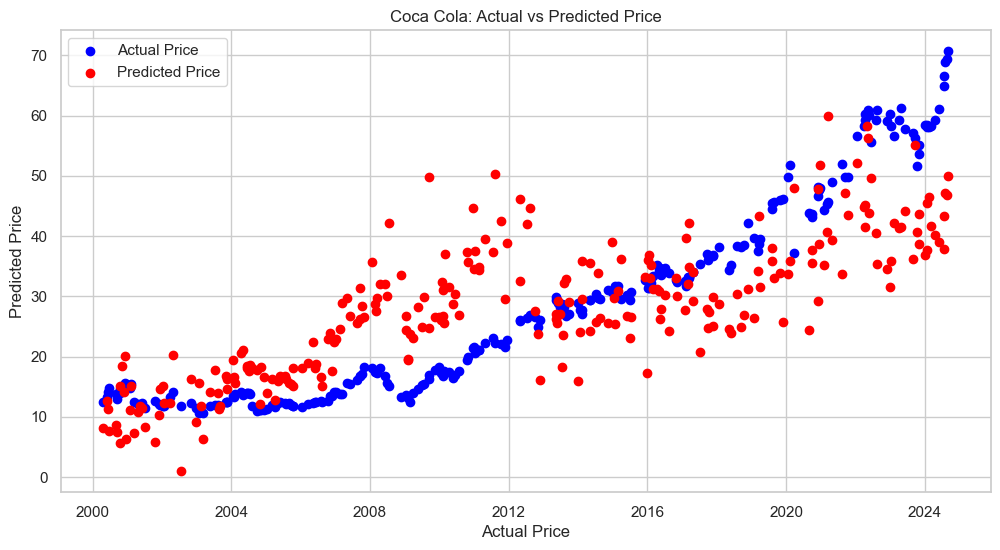

In [27]:
# scatter plot the predictions with the actual prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Price', color='blue')
plt.scatter(y_test.index, coke_predictions, label='Predicted Price', color='red')
plt.title('Coca Cola: Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show();


Now make predictions on the Pepsi data.

In [28]:
# do it all again but for pepsi
X = df_pepsi[['open', 'high', 'low', 'close', 'volume', 'dividend amount']]
y = df_pepsi['adjusted close']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the pipeline on the pepsi data
pipeline.fit(X_train, y_train)

# make predictions on the pepsi test data
pepsi_predictions = pipeline.predict(X_test)

In [29]:
# score the coke predictions
pepsi_score = round(pipeline.score(X_test, y_test), 2)

# root mean squared error score
from sklearn.metrics import mean_squared_error
rmse_pepsi = round(mean_squared_error(y_test, pepsi_predictions, squared=False), 2)

print(f'Pepsi Model\n R^2 Score: {pepsi_score}\n rmse Score: {rmse_pepsi}')

Pepsi Model
 R^2 Score: 0.99
 rmse Score: 3.67


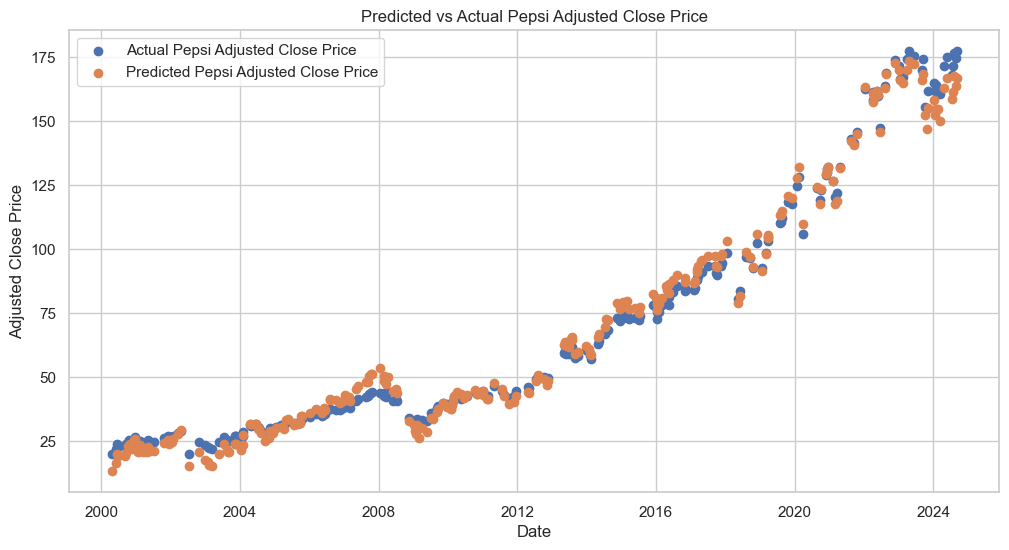

In [30]:
# plot the pepso predictions

plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, y_test, label='Actual Pepsi Adjusted Close Price')
plt.scatter(y_test.index, pepsi_predictions, label='Predicted Pepsi Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Predicted vs Actual Pepsi Adjusted Close Price')
plt.legend()
plt.show();

In [31]:
# print out the model scores
print(f'Coca Cola Model\n R^2 Score: {coke_score}\n rmse Score: {rmse}\n')
print(f'Pepsi Model\n R^2 Score: {pepsi_score}\n rmse Score: {rmse_pepsi}')

Coca Cola Model
 R^2 Score: 0.53
 rmse Score: 11.13

Pepsi Model
 R^2 Score: 0.99
 rmse Score: 3.67


Try grid search cross validate for fun

In [35]:
# testing grid search to find the best parameters for the linear regression model
from sklearn.model_selection import GridSearchCV

X_coke = df_coke[['open', 'high', 'low', 'close', 'volume', 'dividend amount']]
y_coke = df_coke['adjusted close']

X_pepsi = df_pepsi[['open', 'high', 'low', 'close', 'volume', 'dividend amount']]
y_pepsi = df_pepsi['adjusted close']

# Split data into training and test sets
X_train_coke, X_test_coke, y_train_coke, y_test_coke = train_test_split(X_coke, y_coke, test_size=0.2, random_state=42) 
X_train_pepsi, X_test_pepsi, y_train_pepsi, y_test_pepsi = train_test_split(X_pepsi, y_pepsi, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing (scaling) and a linear regression model
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step: Standardize features
    ('regressor', LinearRegression())  # Model: Linear Regression
])

# Define the parameter grid for GridSearchCV (e.g., whether to fit intercept or not)
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False],
    'regressor__n_jobs': [None, -1],
    'regressor__positive': [True, False]
}

# Set up GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
coke_grid_search = grid_search.fit(X_train_coke, y_train_coke)
pepsi_grid_search = grid_search.fit(X_train_pepsi, y_train_pepsi)

# Print the best parameters found by GridSearchCV
print(f'Coca Cola Best Parameters: {coke_grid_search.best_params_}\n')
print(f'Pepsi Best Parameters: {pepsi_grid_search.best_params_}\n')


# Evaluate on test data
coke_score_grid = coke_grid_search.score(X_test_coke, y_test_coke)
pepsi_score_grid = pepsi_grid_search.score(X_test_pepsi, y_test_pepsi)
print(f'Coca Cola R^2 Score: {coke_score_grid}\n')
print(f'Pepsi R^2 Score: {pepsi_score_grid}')

Coca Cola Best Parameters: {'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__n_jobs': None, 'regressor__positive': False}

Pepsi Best Parameters: {'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__n_jobs': None, 'regressor__positive': False}

Coca Cola R^2 Score: 0.09875047468702458

Pepsi R^2 Score: 0.9940304973452285
